In [1]:
import nltk

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

In [3]:
messages = [line.rstrip() for line in open("smsspamcollection/SMSSpamCollection",encoding="UTF-8")]

In [4]:
print(len(messages))

5574


In [5]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [6]:
for mess_no,message in enumerate(messages[:10]):
    print(mess_no,message)
    print("\n")

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [7]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [8]:
import pandas as pd

In [9]:
messages = pd.read_csv("smsspamcollection/SMSSpamCollection",sep="\t",
                      names=["label","message"])

In [10]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
messages.groupby("label").describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [13]:
messages["length"] = messages["message"].apply(len)

In [14]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
%matplotlib inline

In [17]:
plt.style.use("seaborn")

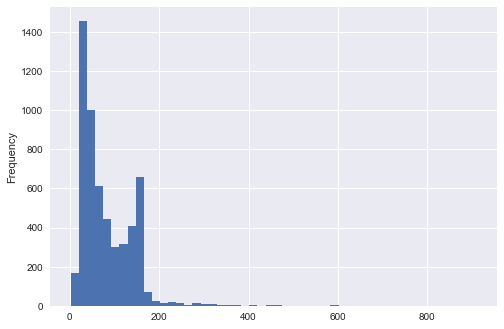

In [18]:
messages["length"].plot.hist(bins=50)

In [19]:
messages["length"].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [20]:
#messages[messages["length"]==910]["message"].iloc[0]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025806E72D08>,
      dtype=object)

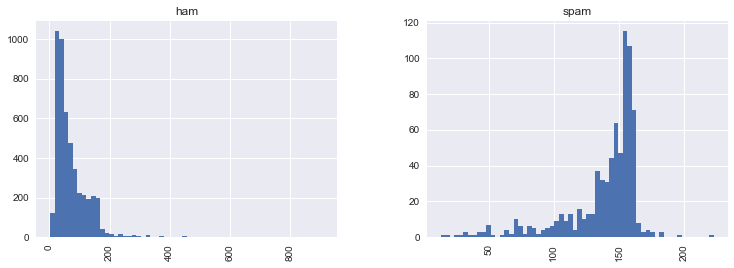

In [21]:
messages.hist(column="length",by="label",bins=60,figsize=(12,4))

In [22]:
import string

In [23]:
mess = "Sample message! Notice: it has punctuation."

In [24]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
nopunc = [c for c in mess if c not in string.punctuation]

In [26]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [27]:
from nltk.corpus import stopwords

In [28]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
nopunc = "".join(nopunc)

In [30]:
nopunc

'Sample message Notice it has punctuation'

In [31]:
x = ["a", "b", "c", "d"]

In [32]:
x

['a', 'b', 'c', 'd']

In [33]:
"".join(x)

'abcd'

In [34]:
"+++".join(x)

'a+++b+++c+++d'

In [35]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [36]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words("english")]

In [37]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [38]:
def text_process(mess):
    """
    1. remove punc
    2. remove stop words
    3. return list of clean text words
    """
    
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = "".join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words("english")]

In [39]:
# messages.head()

In [40]:
messages["message"].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [41]:
#stemming if texts has bunch of similar words eg.running ran run, 
#break all these down and return "run"

# vectorization

In [42]:
# term frequency -> weigh the count -> normalize the vector (L2 norm)

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages["message"])

In [45]:
#creating sparse matrix (疎行列)

In [46]:
print(len(bow_transformer.vocabulary_))

11425


In [47]:
mess4 = messages["message"][3]

In [48]:
print(mess4)

U dun say so early hor... U c already then say...


In [49]:
bow4 = bow_transformer.transform([mess4])

In [50]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [51]:
print(bow4.shape)

(1, 11425)


In [53]:
bow_transformer.get_feature_names()[9554]

'say'

In [54]:
messages_bow = bow_transformer.transform(messages["message"])

In [55]:
print("Shape of Sparse Matrix: ", messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


In [56]:
messages_bow.nnz

50548

In [59]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print("sparsity: {}".format(sparsity))

sparsity: 0.07940295412668218


In [60]:
from sklearn.feature_extraction.text import TfidfTransformer

In [61]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [62]:
tfidf4 = tfidf_transformer.transform(bow4)

In [63]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [64]:
tfidf_transformer.idf_[bow_transformer.vocabulary_["university"]]

8.527076498901426

In [65]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [67]:
from sklearn.naive_bayes import MultinomialNB

In [70]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages["label"])

In [73]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [75]:
messages["label"][3]

'ham'

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
msg_train,msg_test,label_train,label_test = train_test_split(messages["message"],messages["label"],test_size=0.3)

In [78]:
msg_train

3882    Can you plz tell me the ans. BSLVYL sent via f...
165     BangBabes Ur order is on the way. U SHOULD rec...
1018               Shall i send that exe to your mail id.
143     A swt thought: "Nver get tired of doing little...
2661                    Want to finally have lunch today?
                              ...                        
3082    Have a great trip to India. And bring the ligh...
2564    K..k..i'm also fine:)when will you complete th...
3593                                    I anything lor...
550     Ok give me 5 minutes I think I see her. BTW yo...
4776    So many people seems to be special at first si...
Name: message, Length: 3900, dtype: object

In [87]:
from sklearn.pipeline import Pipeline

In [88]:
#try with another one 
#from sklearn.ensemble import RandomForestClassifier


In [89]:
pipeline = Pipeline([
    ("bow",CountVectorizer(analyzer=text_process)),
    ("tfidf", TfidfTransformer()),
    ("classifier",MultinomialNB())
])

In [90]:
#pipeline = Pipeline([
#    ("bow",CountVectorizer(analyzer=text_process)),
#    ("tfidf", TfidfTransformer()),
#    ("classifier",RandomForestClassifier())
#])

In [91]:
pipeline.fit(msg_train,label_train)

C:\Users\okuyama\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000025806EAA8B8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                              

In [92]:
predictions = pipeline.predict(msg_test)

In [93]:
from sklearn.metrics import classification_report

In [94]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1459
        spam       0.99      0.70      0.82       213

    accuracy                           0.96      1672
   macro avg       0.97      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672

